<a href="https://colab.research.google.com/github/yunju05/Practice/blob/main/Multimodelity_practice0326.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 5. Multumodelity DYI

## 1. Text to Text

### A. Sample

In [1]:
# Simple text to text translation example

# English to French dictionary for demonstration
english_to_french = {
    "hello": "bonjour",
    "world": "monde",
    "teacher": "professeur",
    "student": "étudiant"
}

# Input text
input_text = "hello"
translated_text = english_to_french.get(input_text, "Translation not found")

print("English:", input_text)
print("French:", translated_text)


English: hello
French: bonjour


### B. **Applacstion**

In [3]:
#markdown Translation from English to French (words): hello, world, professor, student

# English to French dictionary for demonstration
english_to_french = {
    "hello": "bonjour",
    "world": "monde",
    "teacher": "professeur",
    "student": "étudiant"
}

# Input text
input_text = input()
translated_text = english_to_french.get(input_text, "Translation not found")

print("English:", input_text)
print("French:", translated_text)


hello
English: hello
French: bonjour


In [4]:
#markdown Translation from English to Korean (words): individual, disposal, perspective, distribute

# English to Korean dictionary for demonstration
english_to_korean = {
    "individual": "개인",
    "disposal": "처분",
    "perspective": "관점",
    "distribute": "분배하다"
}

# Input text
input_text = input()
translated_text = english_to_korean.get(input_text, "Translation not found")

print("English:", input_text)
print("Korean:", translated_text)


individual
English: individual
Korean: 개인


In [10]:
#markdown  Simple English Word Quiz for Beginners

# Import necessary library
import random

# Dictionary of words and their meanings
word_dict = {
    "ample": "more than enough, plentiful",
    "concur": "agree, be of the same opinion",
    "diligent": "hardworking, industrious, not lazy",
    "enhance": "improve, make better or clearer",
    "emotion": "a feeling triggered by stimuli" }

# Function to run the quiz
def run_quiz(word_dict):
    score = 0
    words = list(word_dict.keys())
    random.shuffle(words)  # Shuffle the words to change the order each time

    # Loop through the words and ask the user to match the correct definition
    for word in words:
        print(f"What is the meaning of '{word}'?")
        # Show all possible definitions with a shuffle
        definitions = list(word_dict.values())
        random.shuffle(definitions)

        for idx, definition in enumerate(definitions):
            print(f"{idx + 1}. {definition}")

        user_answer = input("Enter the number of the correct definition: ")
        if user_answer.isdigit() and definitions[int(user_answer) - 1] == word_dict[word]:
            print("Correct!\n")
            score += 1
        else:
            print(f"Wrong! The correct answer was: {word_dict[word]}\n")

    print(f"Quiz complete! Your score was {score}/{len(words)}.")

# Run the quiz
run_quiz(word_dict)


What is the meaning of 'emotion'?
1. hardworking, industrious, not lazy
2. agree, be of the same opinion
3. improve, make better or clearer
4. a feeling triggered by stimuli
5. more than enough, plentiful
Enter the number of the correct definition: 1
Wrong! The correct answer was: a feeling triggered by stimuli

What is the meaning of 'ample'?
1. agree, be of the same opinion
2. a feeling triggered by stimuli
3. more than enough, plentiful
4. improve, make better or clearer
5. hardworking, industrious, not lazy
Enter the number of the correct definition: 2
Wrong! The correct answer was: more than enough, plentiful

What is the meaning of 'concur'?
1. a feeling triggered by stimuli
2. improve, make better or clearer
3. hardworking, industrious, not lazy
4. agree, be of the same opinion
5. more than enough, plentiful
Enter the number of the correct definition: 3
Wrong! The correct answer was: agree, be of the same opinion

What is the meaning of 'enhance'?
1. improve, make better or clea

Button(description='Play', style=ButtonStyle())

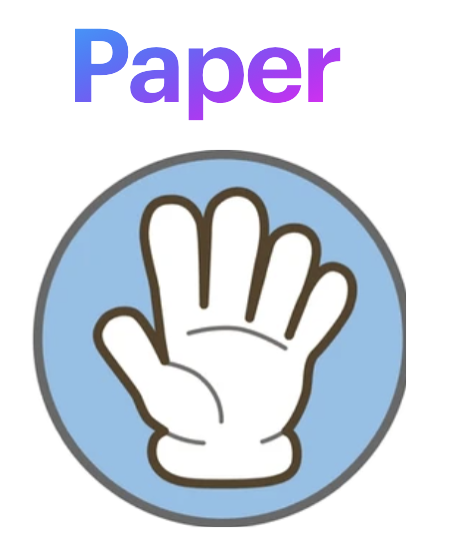

Displaying: Paper


In [13]:
#markdown Rock, Paper, Scissors (image)
# Import necessary libraries
from IPython.display import display, Image
import ipywidgets as widgets
import random

# Upload your images to Colab first
# Define a dictionary to hold the image file paths
image_files = {
    'Rock': 'https://github.com/MK316/Digital-Literacy-Class/raw/main/images/rock.png',
    'Paper': 'https://github.com/MK316/Digital-Literacy-Class/raw/main/images/paper.png',
    'Scissors': 'https://github.com/MK316/Digital-Literacy-Class/sissors/main/images/scissors.png'
}

# Function to display an image based on the game's choice
def show_image(b):
    choice = random.choice(list(image_files.keys()))  # Randomly select rock, paper, or scissors
    display(Image(image_files[choice]))
    print(f"Displaying: {choice}")

# Create a button widget
play_button = widgets.Button(description="Play")

# Bind the button click event to the image display function
play_button.on_click(show_image)

# Display the button in the output cell
display(play_button)


In [22]:
%%capture
!pip install gradio

In [23]:
#@markdown Story Arrangement
import gradio as gr
import random

# Original order of story parts
story_parts = [
    "Tom wakes up early.",
    "He eats breakfast.",
    "Tom goes to school.",
    "He studies English.",
    "Tom returns home."
]

def display_story():
    # Shuffle the story parts and return them with indices
    shuffled_parts = random.sample(story_parts, len(story_parts))
    display_text = "\n".join(f"{idx + 1}. {part}" for idx, part in enumerate(shuffled_parts))
    return display_text, shuffled_parts

def arrange_story(order, shuffled_parts):
    try:
        # Convert string input into indices
        indices = list(map(int, order.split()))
        # Validate indices are within the correct range
        if any(i < 1 or i > len(shuffled_parts) for i in indices):
            return "Please enter valid indices within the range.", "Incorrect"
        # Rearrange story according to user's input
        arranged_story = [shuffled_parts[i-1] for i in indices]  # -1 because user inputs are 1-indexed
        arranged_text = "\n".join(arranged_story)

        # Check if the arranged story matches the original
        if arranged_story == story_parts:
            feedback = "😍 Correct! Well done arranging the story in the right order."
            status = "Correct"
        else:
            feedback = "😓 That's not quite right. Try again!"
            status = "Incorrect"
        return arranged_text, feedback, status
    except Exception as e:
        return f"Error: {str(e)}\nPlease enter a space-separated list of numbers.", "Error"

# Gradio interface that shows shuffled parts and takes input for arranging them
def setup_interface():
    display_text, shuffled_parts = display_story()
    with gr.Blocks() as demo:
        gr.Markdown("### Shuffled Story Parts")
        gr.Markdown(display_text)
        order_input = gr.Textbox(label="Enter the order of the story parts (e.g., 1 2 3 4 5): ❗ The numbers should be space-separated.")
        submit_button = gr.Button("Submit")
        output_text = gr.Textbox(label="Arranged Story", interactive=False)
        feedback_text = gr.Textbox(label="Feedback", interactive=False, visible=True)

        submit_button.click(
            fn=lambda order: arrange_story(order, shuffled_parts),
            inputs=order_input,
            outputs=[output_text, feedback_text]
        )

    return demo

# Launch the interface
app = setup_interface()
app.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://094d8b4ed25463b656.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [24]:
%%capture
!pip install gTTS

In [29]:
# Install and import necessary library

from gtts import gTTS
from IPython.display import Audio

# Input text
text_to_speak = input("Type any text to convert to audio ")

# Convert text to speech
tts = gTTS(text_to_speak)
tts.save('output.mp3')
Audio('output.mp3')


KeyboardInterrupt: Interrupted by user

In [30]:
#@markdown Gradio app (TTS)
import gradio as gr
from gtts import gTTS
import os

def generate_speech(text):
    # Convert text to speech
    tts = gTTS(text)
    # Save speech to a temporary file
    filename = "temp_speech.mp3"
    tts.save(filename)
    return filename

# Create a Gradio interface
iface = gr.Interface(
    fn=generate_speech,
    inputs="text",
    outputs=gr.Audio(label="Play Speech", autoplay=False),
    title="😍 My TTS: Text to Speech Generator",
    description="Type in text and generate speech as you type. Powered by gTTS."
)

# Launch the application
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://881b6356e8b332bd68.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
